# Cleaning Modes With Rational Filters

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
import seaborn as sns
import scipy.signal as ss
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from gwpy.timeseries import TimeSeries

In [4]:
import qnm
omega220 = qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0.692)[0]
omega221 = qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=0.692)[0]

## GW150914

Download data

In [5]:
# !wget https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_16KHZ_R1-1126259447-32.hdf5
# !wget https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_16KHZ_R1-1126259447-32.hdf5

Set some parameters of GW150914

Load data

## Noise realisation

In [6]:
iterations = 2
offset = np.arange(-iterations//2, iterations//2+1)
offset = np.delete(offset, iterations//2)

In [7]:
index=0
t0 = 1126259462
duration = 16
lower = min(t0+16*offset[index], t0+16*(offset[index]+1))
upper = max(t0+16*offset[index], t0+16*(offset[index]+1))

In [15]:
timeseries = TimeSeries.fetch_open_data('H1', 1126259428, 1126259428+1)

In [16]:
qnm_chunk = qnm_filter.RealData(timeseries.value, index=timeseries.times.value)

## qnm_filter

In [21]:
t0 = 1126259462 - 32
input = dict(model_list = [(2, 2, 0, 'p')], #l, m, n, prograde/retrograde
             # trucation time (geocenter, in second)
             t_init = 1126259428+0.5,
             # length of the analysis segment (in second)
             segment_length = 0.2,
             # sampling rate after conditioning (in Hz)
             srate = 4096,
             flow = 20)

fit = qnm_filter.Network(**input)

In [22]:
fit.original_data['H1'] = qnm_chunk

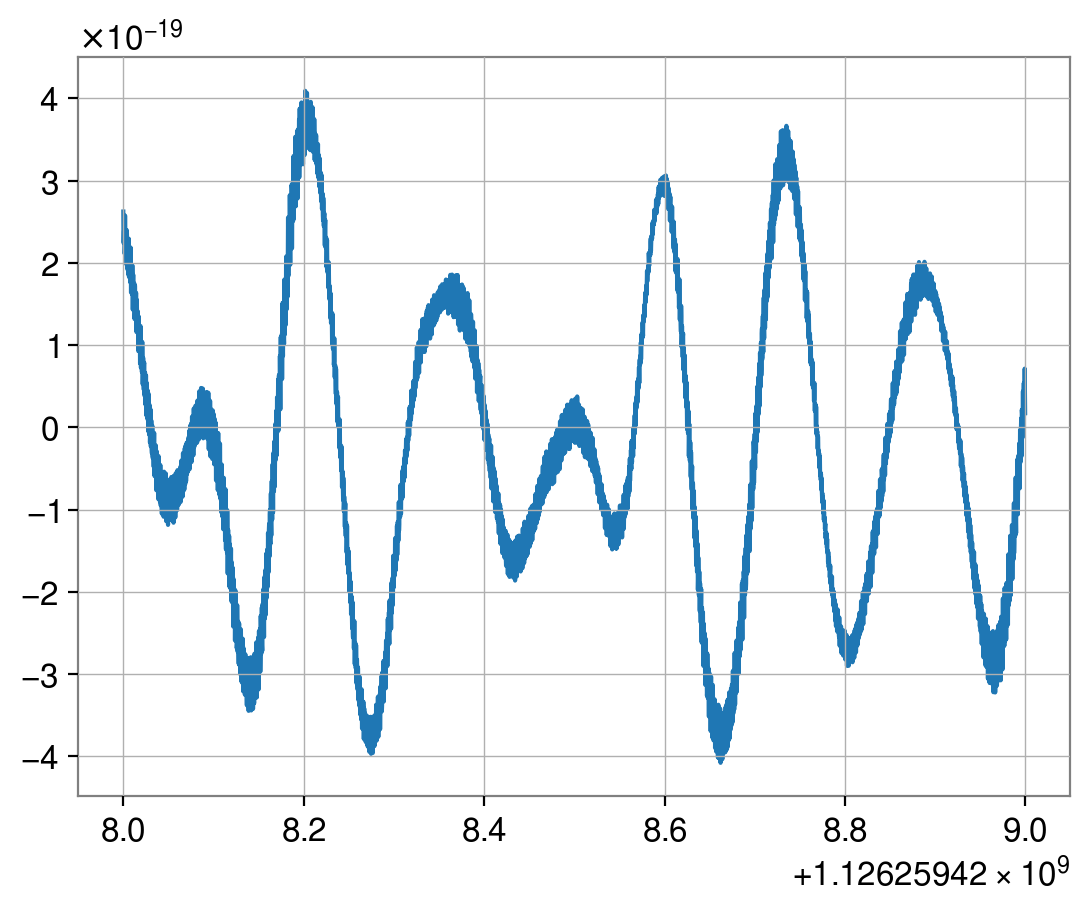

In [23]:
pl.plot(fit.original_data['H1'])

Perform time alignment across detectors

Condition data 

In [28]:
fit.detector_alignment()
fit.condition_data('original_data', trim=0, **input)

In [29]:
len(fit.original_data['H1'])

2048

Cholesky-decomposition of the covariance matrix 

In [30]:
fit.compute_acfs('original_data')
fit.cholesky_decomposition()

/home/neil/Dropbox/Ringdown/Codebase/qnm_filter/qnm_filter/Network.py:210: UserWarning: Overwriting ACFs
  warnings.warn("Overwriting ACFs")
/home/neil/anaconda3/envs/ringdown/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 4096 is greater than input length  = 2048, using nperseg = 2048
  warnings.warn('nperseg = {0:d} is greater than input length '


<AxesSubplot: >

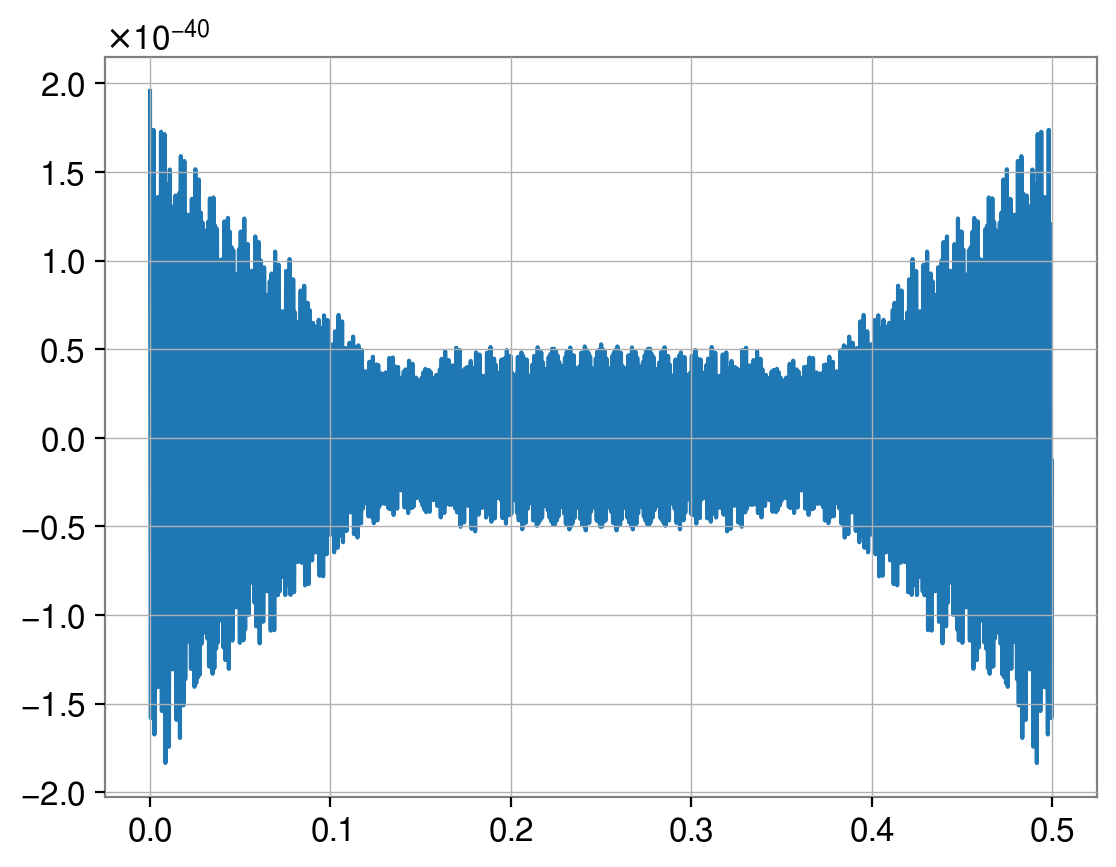

In [31]:
fit.acfs['H1'].plot()

## Likelihood as a function of mass and spin

Sampling remnant mass and spin

In [104]:
delta_mass = 2.0
delta_chi = 0.03
massspace = np.arange(34, 100, delta_mass)
chispace = np.arange(0.0, 0.95, delta_chi)
mass_grid, chi_grid = np.meshgrid(massspace, chispace)

Interate over the samplings

In [105]:
fit.first_index()
likelihood_data, _ = qnm_filter.parallel_compute(fit, massspace, chispace, num_cpu = -1, **input)
credible_region = qnm_filter.find_credible_region(likelihood_data)

1126259430
0


In [106]:
projected_mass, projected_chi = qnm_filter.project_to_1d(likelihood_data, delta_mass, delta_chi)

Plot 2d contours

Text(0, 0.5, '$\\chi_f$')

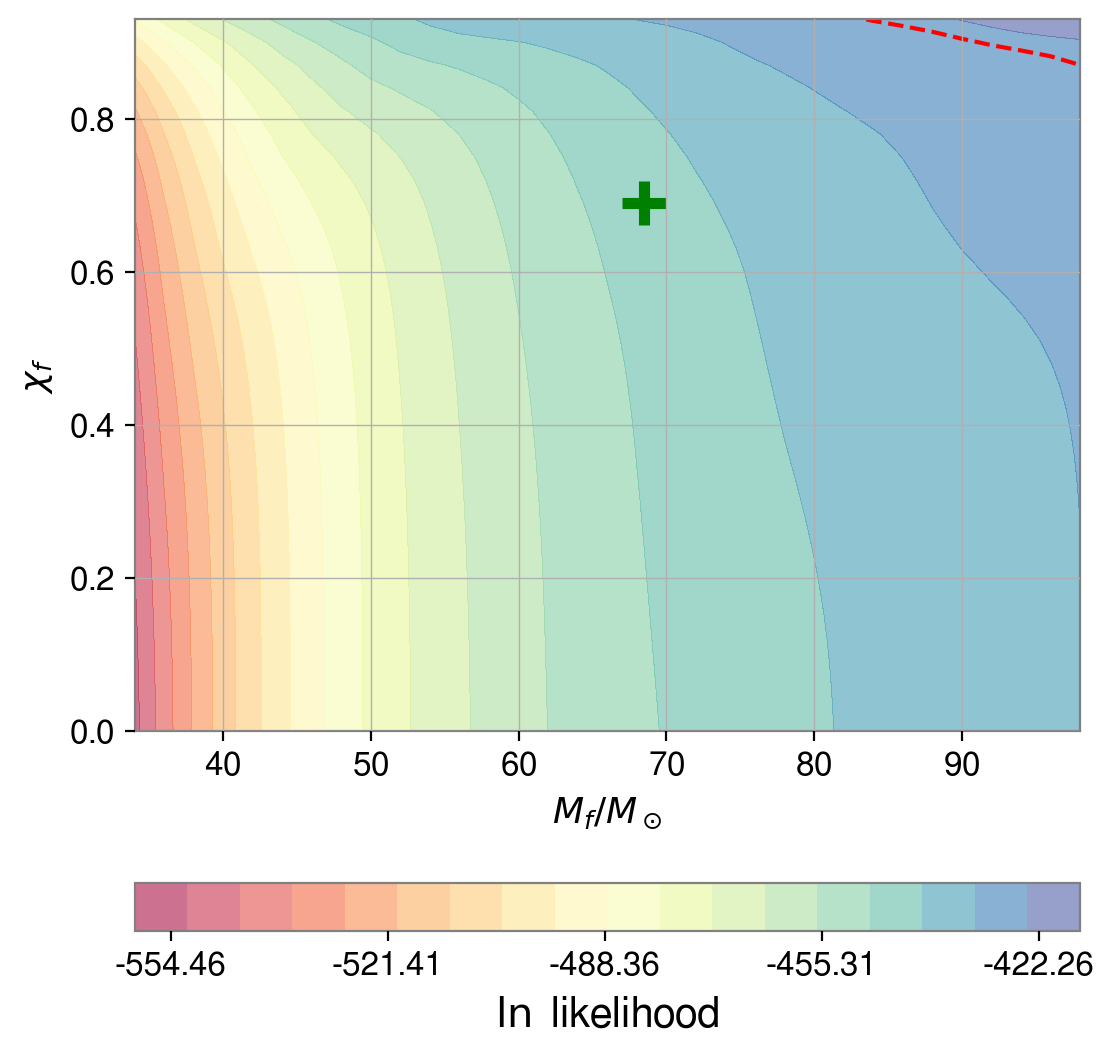

1.126259e+09    3.050676e-20
dtype: float64
1.126259e+09    2.985893e-20
dtype: float64
1.126259e+09    3.031545e-20
dtype: float64
1.126259e+09    3.025170e-20
dtype: float64
1.126259e+09    2.974552e-20
dtype: float64
1.126259e+09    2.945011e-20
dtype: float64
1.126259e+09    2.944317e-20
dtype: float64
1.126259e+09    2.940691e-20
dtype: float64
1.126259e+09    2.938683e-20
dtype: float64
1.126259e+09    2.942426e-20
dtype: float64
1.126259e+09    2.950576e-20
dtype: float64
1.126259e+09    2.959383e-20
dtype: float64
1.126259e+09    2.968341e-20
dtype: float64
1.126259e+09    2.897809e-20
dtype: float64
1.126259e+09    2.900033e-20
dtype: float64
1.126259e+09    2.904712e-20
dtype: float64
1.126259e+09    2.912099e-20
dtype: float64
1.126259e+09    2.863882e-20
dtype: float64
1.126259e+09    2.862690e-20
dtype: float64
1.126259e+09    2.866160e-20
dtype: float64
1.126259e+09    2.876261e-20
dtype: float64
1.126259e+09    2.891146e-20
dtype: float64
1.126259e+09    2.905164e-20
dty

1.126259e+09    3.020844e-20
dtype: float64
1.126259e+09    3.042486e-20
dtype: float64
1.126259e+09    3.028722e-20
dtype: float64
1.126259e+09    3.010009e-20
dtype: float64
1.126259e+09    2.995615e-20
dtype: float64
1.126259e+09    3.053196e-20
dtype: float64
1.126259e+09    3.094480e-20
dtype: float64
1.126259e+09    3.002927e-20
dtype: float64
1.126259e+09    3.018691e-20
dtype: float64
1.126259e+09    3.034833e-20
dtype: float64
1.126259e+09    3.044662e-20
dtype: float64
1.126259e+09    3.033957e-20
dtype: float64
1.126259e+09    2.975859e-20
dtype: float64
1.126259e+09    2.970303e-20
dtype: float64
1.126259e+09    2.994163e-20
dtype: float64
1.126259e+09    3.035854e-20
dtype: float64
1.126259e+09    2.955486e-20
dtype: float64
1.126259e+09    2.990080e-20
dtype: float64
1.126259e+09    2.947181e-20
dtype: float64
1.126259e+09    2.949519e-20
dtype: float64
1.126259e+09    2.933057e-20
dtype: float64
1.126259e+09    2.934492e-20
dtype: float64
1.126259e+09    2.930822e-20
dty

1.126259e+09    3.040809e-20
dtype: float64
1.126259e+09    3.034443e-20
dtype: float64
1.126259e+09    3.050504e-20
dtype: float64
1.126259e+09    2.995906e-20
dtype: float64
1.126259e+09    2.952604e-20
dtype: float64
1.126259e+09    2.956473e-20
dtype: float64
1.126259e+09    2.933894e-20
dtype: float64
1.126259e+09    2.932919e-20
dtype: float64
1.126259e+09    2.953893e-20
dtype: float64
1.126259e+09    2.951498e-20
dtype: float64
1.126259e+09    2.948953e-20
dtype: float64
1.126259e+09    2.946258e-20
dtype: float64
1.126259e+09    2.962397e-20
dtype: float64
1.126259e+09    2.965930e-20
dtype: float64
1.126259e+09    2.954541e-20
dtype: float64
1.126259e+09    2.917157e-20
dtype: float64
1.126259e+09    2.948126e-20
dtype: float64
1.126259e+09    2.947265e-20
dtype: float64
1.126259e+09    2.946309e-20
dtype: float64
1.126259e+09    2.945251e-20
dtype: float64
1.126259e+09    2.944083e-20
dtype: float64
1.126259e+09    2.942794e-20
dtype: float64
1.126259e+09    2.941372e-20
dty

1.126259e+09    3.043804e-20
dtype: float64
1.126259e+09    3.027743e-20
dtype: float64
1.126259e+09    2.956883e-20
dtype: float64
1.126259e+09    2.961015e-20
dtype: float64
1.126259e+09    2.988052e-20
dtype: float64
1.126259e+09    2.962614e-20
dtype: float64
1.126259e+09    3.015900e-20
dtype: float64
1.126259e+09    3.012507e-20
dtype: float64
1.126259e+09    2.951544e-20
dtype: float64
1.126259e+09    2.949019e-20
dtype: float64
1.126259e+09    2.946406e-20
dtype: float64
1.126259e+09    2.943721e-20
dtype: float64
1.126259e+09    2.950059e-20
dtype: float64
1.126259e+09    2.959903e-20
dtype: float64
1.126259e+09    2.968975e-20
dtype: float64
1.126259e+09    2.976452e-20
dtype: float64
1.126259e+09    2.895225e-20
dtype: float64
1.126259e+09    2.905031e-20
dtype: float64
1.126259e+09    2.917100e-20
dtype: float64
1.126259e+09    2.929284e-20
dtype: float64
1.126259e+09    2.940002e-20
dtype: float64
1.126259e+09    2.948873e-20
dtype: float64
1.126259e+09    2.950772e-20
dty

1.126259e+09    3.046516e-20
dtype: float64
1.126259e+09    3.001656e-20
dtype: float64
1.126259e+09    2.969017e-20
dtype: float64
1.126259e+09    2.982304e-20
dtype: float64
1.126259e+09    3.023339e-20
dtype: float64
1.126259e+09    2.952768e-20
dtype: float64
1.126259e+09    2.966657e-20
dtype: float64
1.126259e+09    2.959142e-20
dtype: float64
1.126259e+09    3.004220e-20
dtype: float64
1.126259e+09    2.945033e-20
dtype: float64
1.126259e+09    2.942821e-20
dtype: float64
1.126259e+09    2.976971e-20
dtype: float64
1.126259e+09    2.984755e-20
dtype: float64
1.126259e+09    2.990663e-20
dtype: float64
1.126259e+09    2.992277e-20
dtype: float64
1.126259e+09    2.921833e-20
dtype: float64
1.126259e+09    2.932864e-20
dtype: float64
1.126259e+09    2.943875e-20
dtype: float64
1.126259e+09    2.953928e-20
dtype: float64
1.126259e+09    2.913198e-20
dtype: float64
1.126259e+09    2.907923e-20
dtype: float64
1.126259e+09    2.902002e-20
dtype: float64
1.126259e+09    2.895443e-20
dty

In [107]:
pl.rc('figure', figsize=(6.1, 6.6))
fig, ax = pl.subplots()
contours = ax.contourf(mass_grid, chi_grid, likelihood_data, 20, cmap='Spectral',
                       origin='lower', alpha=0.6, linestyles='--')
dotted = ax.contour(mass_grid, chi_grid, likelihood_data, [credible_region], colors = 'red', \
                   linestyles ='--')
ax.scatter(x=68.5, y=0.69, s=255, marker='+', 
           c='g', linewidths=4, label='IMR')


# coloarbar
cbar=fig.colorbar(contours, orientation="horizontal", 
                  pad=0.15, format='%3.2f')
cbar.set_label(r'$\ln$ likelihood', fontsize=15)
cbar.set_ticks(np.linspace(np.min(likelihood_data), np.max(likelihood_data), 5))

pl.xlabel(r'$M_f/M_\odot$', fontsize=13)
pl.ylabel(r'$\chi_f$', fontsize=13)

# ax.set_title(r'$\mathcal{F}_{220}+\mathcal{F}_{221}$')

With 1D side plots

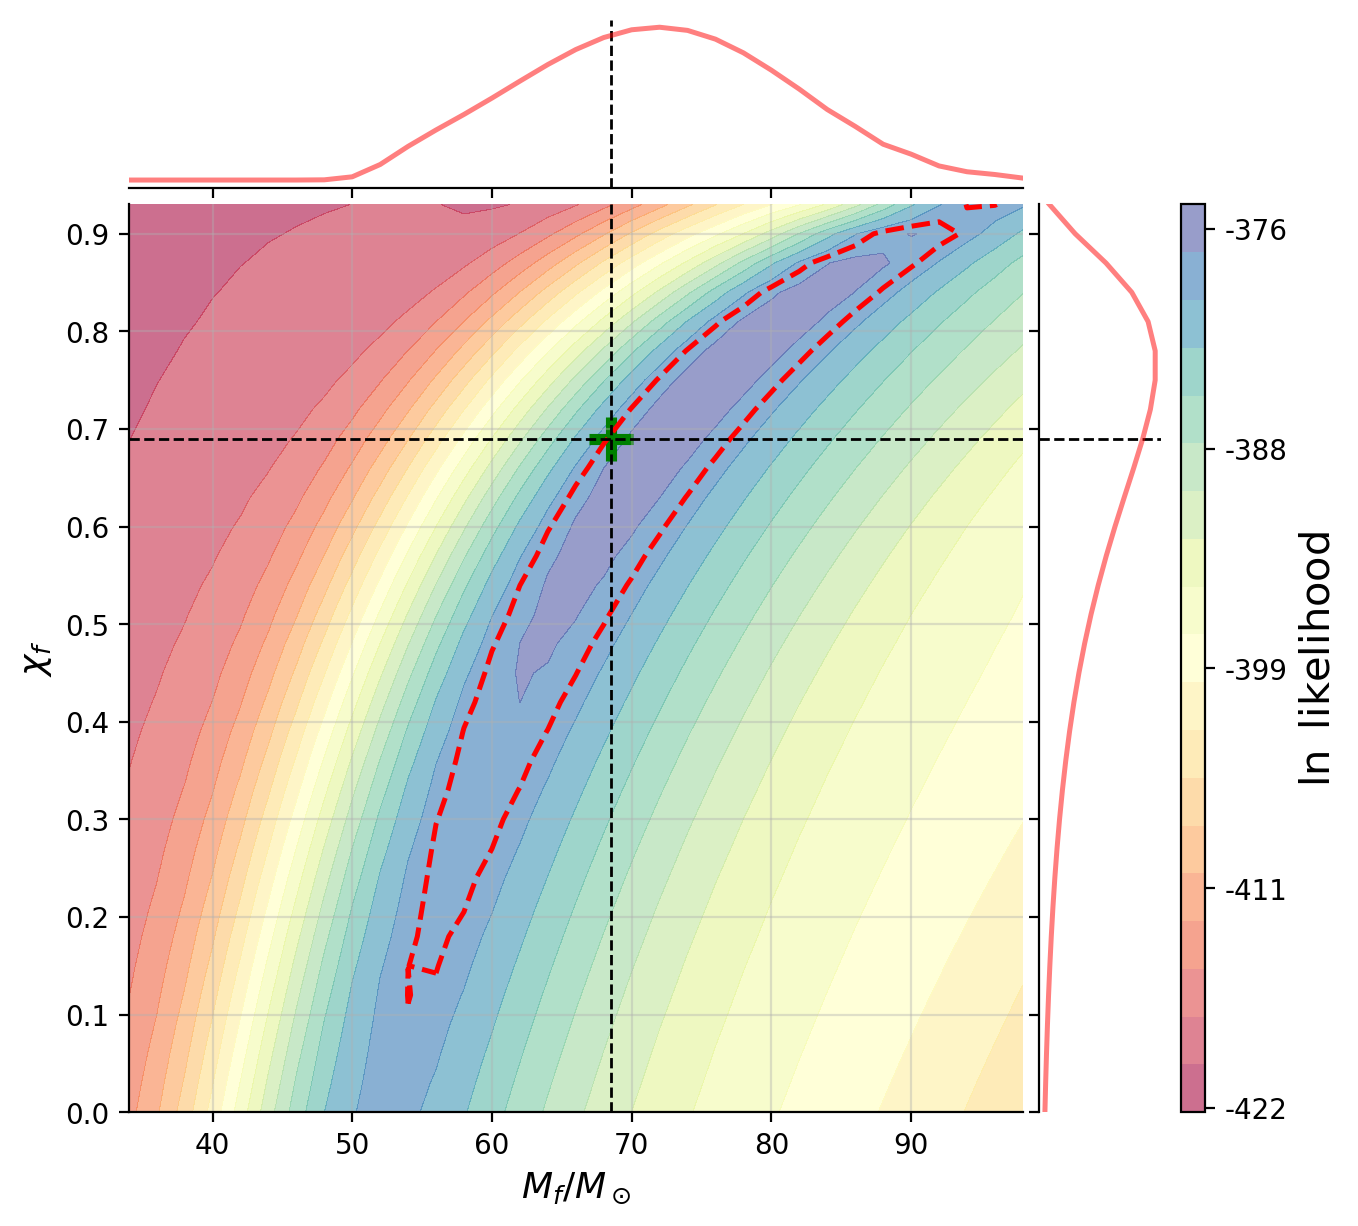

In [13]:
g = sns.JointGrid(ratio=5,space=0.1)

# 2D
contours=g.ax_joint.contourf(mass_grid, chi_grid, likelihood_data, 20, cmap='Spectral',
                       origin='lower', alpha=0.6, linestyles='--')
g.ax_joint.contour(contours, levels=[credible_region], linewidths=1.8,
                   linestyles='--', colors='red')
g.ax_joint.xaxis.set_major_locator(MultipleLocator(10))
g.ax_joint.yaxis.set_major_locator(MultipleLocator(0.1))
g.ax_joint.scatter(x=68.5, y=0.69, s=255, marker='+', 
                   c='g', linewidths=4, label='IMR')
g.ax_joint.axvline(68.5, ls='--', lw=1, c='k')
g.ax_joint.axhline(0.69, ls='--', lw=1, c='k')
g.ax_joint.set_xlabel(r'$M_f/M_\odot$', fontsize=13)
g.ax_joint.set_ylabel(r'$\chi_f$', fontsize=13)
g.ax_joint.grid(alpha=0.4)

# 1D side plots 
g.ax_marg_x.axvline(68.5, ls='--', lw=1, c='k')
g.ax_marg_x.plot(massspace, projected_mass, color='r', lw=1.8, alpha=0.5)

g.ax_marg_y.axhline(0.69, ls='--', lw=1, c='k')
g.ax_marg_y.plot(projected_chi, chispace, color='r',lw=1.8,alpha=0.5)

# coloarbar
divider = make_axes_locatable(g.ax_marg_y)
cax = divider.append_axes('right', size='20%', pad=0.1)
cbar=g.fig.colorbar(contours, cax=cax, orientation="vertical", format='%3.0f', ax=g.ax_marg_y)
cbar.set_label(r'$\ln$ likelihood', fontsize=15)
cbar.set_ticks(np.linspace(np.min(likelihood_data), np.max(likelihood_data), 5))